## Bell States

<div class="alert alert-block alert-info">
Bell state is constructed with application of $\textbf{Hadamard}$ and $\textbf{CNOT}$ gates in two qubit system.
</div>

In [1]:
%matplotlib inline
import numpy as np
import IPython
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit.tools.jupyter import *
from qiskit.visualization import *
import seaborn as sns
sns.set()

In [2]:
from helper import *

### 1. Bell State Circuit ($\beta_{00}$)

In [5]:
def circuit_00():
    qc = QuantumCircuit(2,2)
    qc.h(0)
    qc.barrier()
    qc.cx(0, 1)
    return qc

#### 1.1 Circuit Diagram

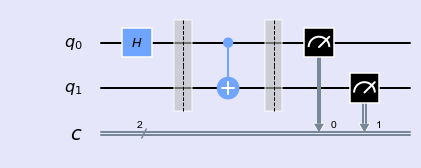

In [6]:
bell_00 = circuit_00()
drawCircuit(bell_00)

#### 1.2. Two qubit system (state vector)

<div class="alert alert-block alert-success">
    <ul>
        <li> Initial state = |00> </li>
        <li> After application of Hadamard Gate: $\frac{1}{\sqrt{2}}|00\rangle + \frac{1}{\sqrt{2}}|01\rangle $ </li>
        <li> After application of CNOT Gate: $\frac{1}{\sqrt{2}}|00 \rangle + \frac{1}{\sqrt{2}}|11 \rangle $ </li>
    </ul>
</div>


In [7]:
bell_00 = circuit_00()
writeState(bell_00)

HTMLMath(value='$$\\text{State:\n $|\\Psi\\rangle = $}(0.707+0i)|00\\rangle + (0.707+0i)|11\\rangle$$')

In [8]:
def getPhaseSeq():
    phaseDic = []
    qc0 = QuantumCircuit(2,2)
    qc1 = QuantumCircuit(2,2)
    qc1.h(0)
    qc2 = QuantumCircuit(2,2)
    qc2.h(0)
    qc2.cx(0, 1)
    for iqc in [qc0,qc1,qc2]:
        phaseDic.append(getPhase(iqc))
    return phaseDic    

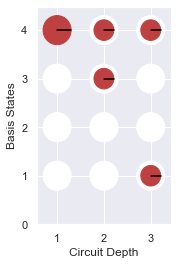

In [9]:
drawPhase(getPhaseSeq())

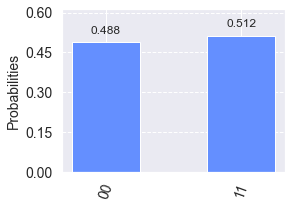

In [10]:
bell_00 = circuit_00()
simCircuit(bell_00)

#### 1.3 Single qubit states (tensor product)

<div class="alert alert-block alert-danger">
$\textbf{Question:}$ Can you write Bell state as a tensor product of single qubit state?
</div>

<div class="alert alert-block alert-info">
$\textbf{Answer}$: No, it is not possible. It is hard to realise.
    
  $\begin{bmatrix}
    p   \\
    q 
\end{bmatrix} \otimes \begin{bmatrix}
    r   \\
    s 
\end{bmatrix} = c \begin{bmatrix}
    m   \\
    0 \\
    0 \\
    n
\end{bmatrix}$
</div>


#### 4. Matrix element (tensor product)

<div class="alert alert-block alert-danger">
$\textbf{Question:}$ Can we write matrix represented by the Bell circuit as a  tensor product of fundamental gate matrices?
</div>

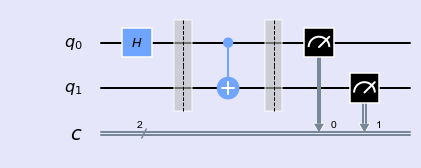

In [11]:
bell_00 = circuit_00()
drawCircuit(bell_00)

<div class="alert alert-block alert-info">
Based on above Bell circuit, lets construct the matrix representation of the circuit using fundamental gates matrices involved in the circuit.

$H = \frac{1}{\sqrt{2}} \begin{bmatrix}
    1  & 1 \\
    1 & -1
\end{bmatrix}; I = \frac{1}{\sqrt{2}} \begin{bmatrix}
    1  & 0 \\
    0 &  1
\end{bmatrix}; \text{CNOT} = \begin{bmatrix} 1 & 0 & 0 & 0 \\
                              0 & 0 & 0 & 1 \\
                              0 & 0 & 1 & 0 \\
                              0 & 1 & 0 & 0 \\
\end{bmatrix}$

- Before first barrier

$I \otimes H$ = $ \begin{bmatrix}
    H  & 0 \\
    0 & H
\end{bmatrix}$

- After first barrier

$\text{CNOT}$ 

- Net operation before measurement

$U = \text{CNOT} \times (I \otimes H)   $
    
</div>

Lets express ``U`` matrix using ``numpy`` library.

In [11]:
I = np.eye(2,2)
H = 1/np.sqrt(2)*np.array([[1,1],[1,-1]])
CNOT = np.array([[1,0,0,0],[0,0,0,1],[0,0,1,0],[0,1,0,0]])
I_kron_H = np.kron(I,H)
U = np.dot(CNOT,I_kron_H)
print(U)

[[ 0.70710678  0.70710678  0.          0.        ]
 [ 0.          0.          0.70710678 -0.70710678]
 [ 0.          0.          0.70710678  0.70710678]
 [ 0.70710678 -0.70710678  0.          0.        ]]


We can also observe final ket vector by multiplying it with ```U``` matrix.

In [12]:
ket_00 = np.array([1,0,0,0])
np.dot(U,ket_00)

array([0.70710678, 0.        , 0.        , 0.70710678])

<div class="alert alert-block alert-info">
Infact we can check our matrix from our circuit shown below by implementing Q is kit's "unitary_simulator".
</div>

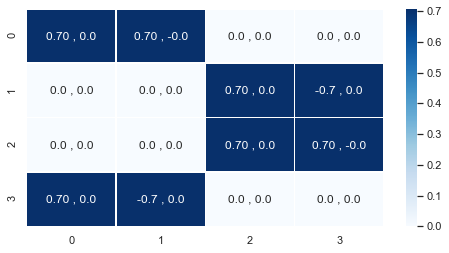

In [13]:
bell_00 = circuit_00()
plotMatrix(bell_00)

-------